In [22]:
#import the required libraries
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.ticker as mtick  
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
from datetime import datetime
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from numpy import mean
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
plt.rc("font", size=14)
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
pd.set_option('display.max_columns', None)

# Data Preparation

In [24]:
data=pd.read_excel("Telco_customer_churn.xlsx")
data.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [25]:
data.drop(['Count','CustomerID','City','Country','State','Zip Code','Lat Long','Latitude','Longitude','Churn Reason',],axis=1,inplace=True)

In [26]:
data['Total Charges'] = pd.to_numeric(data['Total Charges'], errors='coerce')
data.isnull().sum()

Gender                0
Senior Citizen        0
Partner               0
Dependents            0
Tenure Months         0
Phone Service         0
Multiple Lines        0
Internet Service      0
Online Security       0
Online Backup         0
Device Protection     0
Tech Support          0
Streaming TV          0
Streaming Movies      0
Contract              0
Paperless Billing     0
Payment Method        0
Monthly Charges       0
Total Charges        11
Churn Label           0
Churn Value           0
Churn Score           0
CLTV                  0
dtype: int64

In [27]:
data.loc[data['Total Charges'].isnull() == True]

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV
2234,Female,No,Yes,No,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No,0,36,2578
2438,Male,No,No,No,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No,0,68,5504
2568,Female,No,Yes,No,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No,0,45,2048
2667,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No,0,48,4950
2856,Female,No,Yes,No,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No,0,30,4740
4331,Male,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No,0,53,2019
4687,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No,0,49,2299
5104,Female,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No,0,27,3763
5719,Male,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No,0,69,4890
6772,Female,No,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No,0,44,2342


In [28]:
#Removing missing values 
data.dropna(how = 'any', inplace = True)

In [29]:
data.drop('Churn Label',axis=1,inplace=True)

In [30]:
categorical_var = list(data.dtypes.loc[data.dtypes == 'object'].index)
print(len(categorical_var))
print(categorical_var)

16
['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method']


In [31]:
continuous_var = ['Tenure Months','Monthly Charges','Total Charges','Churn Score','CLTV']
data.describe()

,Tenure Months,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441,0.265785,58.715301,4401.445108
std,24.545260,30.085974,2266.771362,0.441782,21.531321,1182.414266
min,1.000000,18.250000,18.800000,0.000000,5.000000,2003.000000
25%,9.000000,35.587500,401.450000,0.000000,40.000000,3469.750000
50%,29.000000,70.350000,1397.475000,0.000000,61.000000,4527.500000
75%,55.000000,89.862500,3794.737500,1.000000,75.000000,5381.000000
max,72.000000,118.750000,8684.800000,1.000000,100.000000,6500.000000


# create dummy 

ตัวแปรที่เป็นคุณภาพ เพื่อให้สามารถดูความสัมพันธ์กับ Churn Value ได้

In [32]:
cat_vars=['Gender',
 'Senior Citizen',
 'Partner',
 'Dependents',
 'Phone Service',
 'Multiple Lines',
 'Internet Service',
 'Online Security',
 'Online Backup',
 'Device Protection',
 'Tech Support',
 'Streaming TV',
 'Streaming Movies',
 'Contract',
 'Paperless Billing',
 'Payment Method']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1=data.join(cat_list)
    data=data1
cat_vars=['Gender',
 'Senior Citizen',
 'Partner',
 'Dependents',
 'Phone Service',
 'Multiple Lines',
 'Internet Service',
 'Online Security',
 'Online Backup',
 'Device Protection',
 'Tech Support',
 'Streaming TV',
 'Streaming Movies',
 'Contract',
 'Paperless Billing',
 'Payment Method']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [33]:
data_final=data[to_keep]
data_final.columns.values

array(['Tenure Months', 'Monthly Charges', 'Total Charges', 'Churn Value',
       'Churn Score', 'CLTV', 'Gender_Female', 'Gender_Male',
       'Senior Citizen_No', 'Senior Citizen_Yes', 'Partner_No',
       'Partner_Yes', 'Dependents_No', 'Dependents_Yes',
       'Phone Service_No', 'Phone Service_Yes', 'Multiple Lines_No',
       'Multiple Lines_No phone service', 'Multiple Lines_Yes',
       'Internet Service_DSL', 'Internet Service_Fiber optic',
       'Internet Service_No', 'Online Security_No',
       'Online Security_No internet service', 'Online Security_Yes',
       'Online Backup_No', 'Online Backup_No internet service',
       'Online Backup_Yes', 'Device Protection_No',
       'Device Protection_No internet service', 'Device Protection_Yes',
       'Tech Support_No', 'Tech Support_No internet service',
       'Tech Support_Yes', 'Streaming TV_No',
       'Streaming TV_No internet service', 'Streaming TV_Yes',
       'Streaming Movies_No', 'Streaming Movies_No internet servi

In [34]:
data_final

,Tenure Months,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV,Gender_Female,Gender_Male,Senior Citizen_No,Senior Citizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,Phone Service_No,Phone Service_Yes,Multiple Lines_No,Multiple Lines_No phone service,Multiple Lines_Yes,Internet Service_DSL,Internet Service_Fiber optic,Internet Service_No,Online Security_No,Online Security_No internet service,Online Security_Yes,Online Backup_No,Online Backup_No internet service,Online Backup_Yes,Device Protection_No,Device Protection_No internet service,Device Protection_Yes,Tech Support_No,Tech Support_No internet service,Tech Support_Yes,Streaming TV_No,Streaming TV_No internet service,Streaming TV_Yes,Streaming Movies_No,Streaming Movies_No internet service,Streaming Movies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,Paperless Billing_No,Paperless Billing_Yes,Payment Method_Bank transfer (automatic),Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
0,2,53.85,108.15,1,86,3239,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
1,2,70.70,151.65,1,67,2701,1,0,1,0,1,0,0,1,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
2,8,99.65,820.50,1,86,5372,1,0,1,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0
3,28,104.80,3046.05,1,84,5003,1,0,1,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0
4,49,103.70,5036.30,1,89,5340,0,1,1,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,72,21.15,1419.40,0,45,5306,1,0,1,0,1,0,1,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,1,0,0,0
7039,24,84.80,1990.50,0,59,2140,0,1,1,0,0,1,0,1,0,1,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1
7040,72,103.20,7362.90,0,71,5560,1,0,1,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0
7041,11,29.60,346.45,0,59,2793,1,0,1,0,0,1,0,1,1,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0


# resampling

In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [39]:
X = data_final.loc[:, data_final.columns != 'Churn Value']
y = data_final.loc[:, data_final.columns == 'Churn Value']

# resampling

from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=100)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
columns = X_train.columns

os_data_X,os_data_y=os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['Churn Value'])

# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of Churn Value = 0 is ",len(os_data_y[os_data_y['Churn Value']==0]))
print("Number of Churn Value = 1 is " ,len(os_data_y[os_data_y['Churn Value']==1]))
print("Proportion of  Churn Value = 0  is ",len(os_data_y[os_data_y['Churn Value']==0])/len(os_data_X))
print("Proportion of  Churn Value = 1  is ",len(os_data_y[os_data_y['Churn Value']==1])/len(os_data_X))

length of oversampled data is  7238
Number of Churn Value = 0 is  3619
Number of Churn Value = 1 is  3619
Proportion of  Churn Value = 0  is  0.5
Proportion of  Churn Value = 1  is  0.5


In [40]:
data_dummy=os_data_X.drop(['Tenure Months','Monthly Charges','Total Charges','Churn Score','CLTV'],axis=1)
data_dummy

,Gender_Female,Gender_Male,Senior Citizen_No,Senior Citizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,Phone Service_No,Phone Service_Yes,Multiple Lines_No,Multiple Lines_No phone service,Multiple Lines_Yes,Internet Service_DSL,Internet Service_Fiber optic,Internet Service_No,Online Security_No,Online Security_No internet service,Online Security_Yes,Online Backup_No,Online Backup_No internet service,Online Backup_Yes,Device Protection_No,Device Protection_No internet service,Device Protection_Yes,Tech Support_No,Tech Support_No internet service,Tech Support_Yes,Streaming TV_No,Streaming TV_No internet service,Streaming TV_Yes,Streaming Movies_No,Streaming Movies_No internet service,Streaming Movies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,Paperless Billing_No,Paperless Billing_Yes,Payment Method_Bank transfer (automatic),Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
0,1,0,1,0,1,0,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,1
1,0,1,1,0,0,1,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1
2,0,1,1,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0
3,1,0,1,0,0,1,0,1,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1
4,0,1,1,0,1,0,1,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7233,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
7234,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
7235,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0
7236,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0


# normalized

In [41]:
#mean normalization
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])
    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma
       
    return X_norm, mu, sigma

In [42]:
#Compute the mean and std to be used for later scaling
os_data_X,mu,sigma = featureNormalize(os_data_X.iloc[:, 0:5])
X_poly_test = (X_test-mu)/sigma
os_data_X

,Tenure Months,Monthly Charges,Total Charges,Churn Score,CLTV
0,-1.102488,0.626148,-0.889349,1.570889,-1.678007
1,1.184597,0.776821,1.339213,-0.787409,1.377559
2,0.477680,1.141982,0.827617,-0.093792,0.939850
3,-0.977738,-0.600510,-0.818795,1.108478,0.899523
4,-0.603487,-1.713720,-0.804762,-1.342303,-0.433769
...,...,...,...,...,...
7233,-0.104487,0.818213,0.134831,0.969754,-1.364637
7234,0.228180,0.159820,0.169324,1.154719,-1.687249
7235,0.186597,0.359803,0.199122,1.108478,1.347315
7236,-0.104487,0.662953,0.073934,1.247201,-1.896442


In [43]:
os_data_X=pd.concat([os_data_X, data_dummy], axis=1)
os_data_X

,Tenure Months,Monthly Charges,Total Charges,Churn Score,CLTV,Gender_Female,Gender_Male,Senior Citizen_No,Senior Citizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,Phone Service_No,Phone Service_Yes,Multiple Lines_No,Multiple Lines_No phone service,Multiple Lines_Yes,Internet Service_DSL,Internet Service_Fiber optic,Internet Service_No,Online Security_No,Online Security_No internet service,Online Security_Yes,Online Backup_No,Online Backup_No internet service,Online Backup_Yes,Device Protection_No,Device Protection_No internet service,Device Protection_Yes,Tech Support_No,Tech Support_No internet service,Tech Support_Yes,Streaming TV_No,Streaming TV_No internet service,Streaming TV_Yes,Streaming Movies_No,Streaming Movies_No internet service,Streaming Movies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,Paperless Billing_No,Paperless Billing_Yes,Payment Method_Bank transfer (automatic),Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
0,-1.102488,0.626148,-0.889349,1.570889,-1.678007,1,0,1,0,1,0,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,1
1,1.184597,0.776821,1.339213,-0.787409,1.377559,0,1,1,0,0,1,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1
2,0.477680,1.141982,0.827617,-0.093792,0.939850,0,1,1,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0
3,-0.977738,-0.600510,-0.818795,1.108478,0.899523,1,0,1,0,0,1,0,1,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1
4,-0.603487,-1.713720,-0.804762,-1.342303,-0.433769,0,1,1,0,1,0,1,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7233,-0.104487,0.818213,0.134831,0.969754,-1.364637,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
7234,0.228180,0.159820,0.169324,1.154719,-1.687249,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
7235,0.186597,0.359803,0.199122,1.108478,1.347315,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0
7236,-0.104487,0.662953,0.073934,1.247201,-1.896442,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0


# RFE


ใช้ RFE ในการเลือกตัวแปรอิสระเข้า Model

In [ ]:
#Feature selection 
#Recursive feature elimination
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

#Select best feature 
rfe = RFE(logreg, n_features_to_select=15)  # เลือกตัวแปริสระมา  15 ตัว
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())

#Summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

In [ ]:
os_data_X.columns[rfe.support_]  

#ตัวแปรอิสระ 15 ตัวที่ถูกเลือก
#เอาตัวแปรอิสระ 15 ตัวที่ถูกเลือก มาพิจารณาต่อ ด้วยการดูค่า p-value

Index(['Churn Score', 'Gender_Female', 'Gender_Male', 'Senior Citizen_No',
       'Senior Citizen_Yes', 'Partner_No', 'Partner_Yes', 'Phone Service_No',
       'Multiple Lines_No', 'Multiple Lines_Yes', 'Internet Service_No',
       'Streaming TV_No', 'Contract_Two year', 'Paperless Billing_No',
       'Paperless Billing_Yes'],
      dtype='object')

# Implementing the model

In [44]:
cols=['Churn Score', 'Gender_Female', 'Gender_Male', 'Senior Citizen_No',
       'Senior Citizen_Yes', 'Partner_No', 'Partner_Yes', 'Phone Service_No',
       'Multiple Lines_No', 'Multiple Lines_Yes', 'Internet Service_No',
       'Streaming TV_No', 'Contract_Two year', 'Paperless Billing_No',
       'Paperless Billing_Yes']
X=os_data_X[cols]
y=os_data_y['Churn Value']

In [ ]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.187111
         Iterations 9
                            Results: Logit
Model:                Logit              Pseudo R-squared:   0.730    
Dependent Variable:   Churn Value        AIC:                2738.6164
Date:                 2022-05-05 04:35   BIC:                2841.9229
No. Observations:     7238               Log-Likelihood:     -1354.3  
Df Model:             14                 LL-Null:            -5017.0  
Df Residuals:         7223               LLR p-value:        0.0000   
Converged:            1.0000             Scale:              1.0000   
No. Iterations:       9.0000                                          
----------------------------------------------------------------------
                       Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------------
Churn Score            5.2202   0.1627  32.0922 0.0000  4.9014  5.5390
Gen

In [ ]:
cols=['Churn Score', 'Gender_Female', 'Gender_Male','Partner_Yes', 'Phone Service_No',
       'Multiple Lines_Yes', 'Internet Service_No',
      'Contract_Two year', 'Paperless Billing_No',
       'Paperless Billing_Yes']
X=os_data_X[cols]
y=os_data_y['Churn Value']

In [ ]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.187717
         Iterations 9
                            Results: Logit
Model:                Logit              Pseudo R-squared:   0.729    
Dependent Variable:   Churn Value        AIC:                2737.3897
Date:                 2022-05-05 04:35   BIC:                2806.2607
No. Observations:     7238               Log-Likelihood:     -1358.7  
Df Model:             9                  LL-Null:            -5017.0  
Df Residuals:         7228               LLR p-value:        0.0000   
Converged:            1.0000             Scale:              1.0000   
No. Iterations:       9.0000                                          
----------------------------------------------------------------------
                       Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------------
Churn Score            5.2268   0.1614  32.3765 0.0000  4.9104  5.5432
Gen

In [45]:
cols=['Churn Score', 'Gender_Female', 'Gender_Male','Partner_Yes', 'Phone Service_No',
       'Internet Service_No',
      'Contract_Two year', 'Paperless Billing_No',
       'Paperless Billing_Yes']
X=os_data_X[cols]
y=os_data_y['Churn Value']

In [46]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.187948
         Iterations 9
                            Results: Logit
Model:                Logit              Pseudo R-squared:   0.729    
Dependent Variable:   Churn Value        AIC:                2738.7416
Date:                 2022-11-11 13:18   BIC:                2800.7255
No. Observations:     7238               Log-Likelihood:     -1360.4  
Df Model:             8                  LL-Null:            -5017.0  
Df Residuals:         7229               LLR p-value:        0.0000   
Converged:            1.0000             Scale:              1.0000   
No. Iterations:       9.0000                                          
----------------------------------------------------------------------
                       Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------------
Churn Score            5.2172   0.1612  32.3613 0.0000  4.9012  5.5332
Gen

ตัวแปรอิสระ 9 ตัวนี้มีค่า p-value < 0.05 significant ทุกตัว

# Logistic Regression Model Fitting

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

# model evaluation

In [48]:
#model evaluation
y_pred= logreg.predict(X_test)
print('Training Accuracy: {:.2f} %'.format(np.mean(logreg.predict(X_train) == y_train) * 100))
print('Test Accuracy: {:.2f} %'.format(np.mean(y_pred == y_test) * 100))
print('Expected accuracy (fullmodel) :  80 %')

# จากการสังเกตุ accuracy ที่ training set  พบว่า Model ไม่ประสบปัญหาอะไร จึงนำไป confirm กับ test set ต่อไป

Training Accuracy: 92.62 %
Test Accuracy: 91.80 %
Expected accuracy (fullmodel) :  80 %


In [49]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test,y_test)))
print('accuracy score is: ', accuracy_score(y_test,y_pred))
print('roc auc score is: ', roc_auc_score(y_test,y_pred))
print('precision score is: ',precision_score(y_test,y_pred))
print('recall score is: ', recall_score(y_test,y_pred))
print(classification_report(y_test, y_pred))

Accuracy of logistic regression classifier on test set: 0.92
accuracy score is:  0.91804788213628
roc auc score is:  0.9178259479419595
precision score is:  0.9089301503094607
recall score is:  0.9320036264732547
              precision    recall  f1-score   support

           0       0.93      0.90      0.92      1069
           1       0.91      0.93      0.92      1103

    accuracy                           0.92      2172
   macro avg       0.92      0.92      0.92      2172
weighted avg       0.92      0.92      0.92      2172



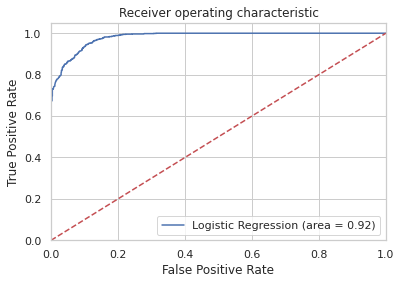

In [ ]:
#ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

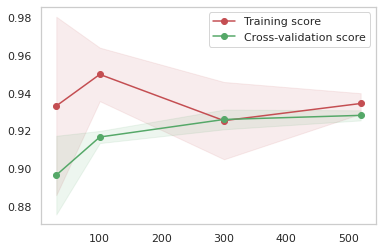

In [ ]:
#learnning curve
train_sizes, train_scores, test_scores = learning_curve(logreg,X_train, y_train, cv = 3, train_sizes = [1, 30,100,300,520])
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                  train_scores_mean + train_scores_std, alpha=0.1,
                  color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                  test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
          label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
          label="Cross-validation score")

plt.legend(loc="best")

# Improvement

In [50]:
def evaluate_model(cv):
  # get the model
  model = LogisticRegression(solver = 'liblinear',max_iter=100)
  # evaluate the model
  scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  # return scores
  return mean(scores), scores.min(), scores.max()

folds = range(2,31)
for k in folds:
    # define the test condition
    cv = KFold(n_splits=k, shuffle=True, random_state=10)
    # record mean and min/max of each set of results
    k_mean, k_min, k_max = evaluate_model(cv)
    # report performance
    print('-> folds=%d, accuracy=%.3f (%.3f,%.3f)' % (k, k_mean, k_min, k_max))

-> folds=2, accuracy=0.924 (0.923,0.924)
-> folds=3, accuracy=0.924 (0.922,0.927)
-> folds=4, accuracy=0.923 (0.918,0.930)
-> folds=5, accuracy=0.924 (0.916,0.930)
-> folds=6, accuracy=0.924 (0.915,0.929)
-> folds=7, accuracy=0.923 (0.908,0.930)
-> folds=8, accuracy=0.923 (0.912,0.935)
-> folds=9, accuracy=0.923 (0.917,0.932)
-> folds=10, accuracy=0.923 (0.913,0.931)
-> folds=11, accuracy=0.923 (0.912,0.939)
-> folds=12, accuracy=0.923 (0.912,0.939)
-> folds=13, accuracy=0.923 (0.908,0.939)
-> folds=14, accuracy=0.923 (0.896,0.944)
-> folds=15, accuracy=0.923 (0.890,0.940)
-> folds=16, accuracy=0.923 (0.898,0.940)
-> folds=17, accuracy=0.923 (0.906,0.948)
-> folds=18, accuracy=0.924 (0.905,0.940)
-> folds=19, accuracy=0.923 (0.906,0.937)
-> folds=20, accuracy=0.923 (0.895,0.950)
-> folds=21, accuracy=0.923 (0.893,0.945)
-> folds=22, accuracy=0.924 (0.894,0.948)
-> folds=23, accuracy=0.923 (0.892,0.940)
-> folds=24, accuracy=0.923 (0.894,0.950)
-> folds=25, accuracy=0.924 (0.890,0.948)


In [51]:
# Model Improvement
#Hyperparameter tuning
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
start_time = datetime.now()

# define model/create instance
lr=LogisticRegression(solver = 'liblinear',max_iter=100)

#tuning weight for minority class then weight for majority class will be 1-weight of minority class
#Setting the range for class weights
weights = np.linspace(0.0,0.99,500)

#specifying all hyperparameters with possible values
param= {'C': [0.1, 0.5, 1,10,15,20], 
        'penalty': ['l2'],
        "class_weight":[{0:x ,1:1.0 -x} for x in weights]}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 100)

#Gridsearch for hyperparam tuning
model= GridSearchCV(estimator= lr,
                    param_grid=param, 
                    scoring="f1",
                    cv=folds,return_train_score=True)

#train model to learn relationships between x and y
model.fit(X_train,y_train)

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Duration: 0:04:12.212569


In [52]:
# print best hyperparameters
print("Best F1 score: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best F1 score:  0.9309526690670697
Best hyperparameters:  {'C': 20, 'class_weight': {0: 0.3432264529058116, 1: 0.6567735470941884}, 'penalty': 'l2'}


In [53]:
#Building Model again with best params
lr3=LogisticRegression(class_weight={0:0.34,1:0.65},C=1,penalty="l2")
lr3.fit(X_train,y_train)

LogisticRegression(C=1, class_weight={0: 0.34, 1: 0.65})

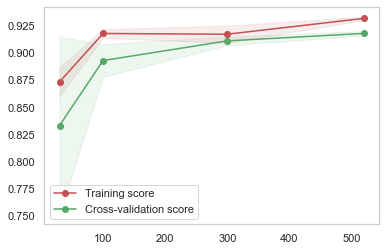

In [54]:
# re-evaluate
train_sizes, train_scores, test_scores = learning_curve(lr3,X_train, y_train, cv = 5, train_sizes = [1, 30,100,300,520])
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                  train_scores_mean + train_scores_std, alpha=0.1,
                  color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                  test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
          label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
          label="Cross-validation score")

plt.legend(loc="best")

In [55]:
# predict probabilities on Test and take probability for class 1([:1])
y_pred_prob_test = lr3.predict_proba(X_test)[:, 1]
#predict labels on test dataset
y_pred_test = lr3.predict(X_test)
# create onfusion matrix
cm = confusion_matrix(y_test, y_pred_test)
print("confusion Matrix is :nn",cm)
print("n")
# Accuracy score
print('accuracy score is: ', accuracy_score(y_test,y_pred_test))
# ROC- AUC score
print("ROC-AUC score  test dataset:  t", roc_auc_score(y_test,y_pred_prob_test))
#Precision score
print("precision score  test dataset:  t", precision_score(y_test,y_pred_test))
#Recall Score
print("Recall score  test dataset:  t", recall_score(y_test,y_pred_test))
#f1 score
print("f1 score  test dataset :  t", f1_score(y_test,y_pred_test))

confusion Matrix is :nn [[ 925  144]
 [  34 1069]]
n
accuracy score is:  0.91804788213628
ROC-AUC score  test dataset:  t 0.9804021178739504
precision score  test dataset:  t 0.8812860676009893
Recall score  test dataset:  t 0.9691749773345422
f1 score  test dataset :  t 0.9231433506044905


In [56]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.96      0.87      0.91      1069
           1       0.88      0.97      0.92      1103

    accuracy                           0.92      2172
   macro avg       0.92      0.92      0.92      2172
weighted avg       0.92      0.92      0.92      2172



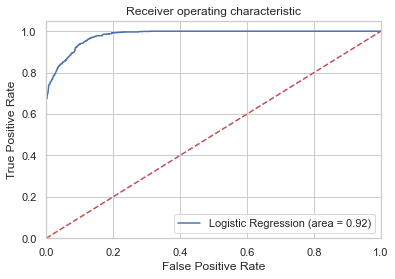

In [57]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
implogit_roc_auc = roc_auc_score(y_test, lr3.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, lr3.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % implogit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Prediction

In [58]:
pd.options.display.max_columns = None
data_final

,Tenure Months,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV,Gender_Female,Gender_Male,Senior Citizen_No,Senior Citizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,Phone Service_No,Phone Service_Yes,Multiple Lines_No,Multiple Lines_No phone service,Multiple Lines_Yes,Internet Service_DSL,Internet Service_Fiber optic,Internet Service_No,Online Security_No,Online Security_No internet service,Online Security_Yes,Online Backup_No,Online Backup_No internet service,Online Backup_Yes,Device Protection_No,Device Protection_No internet service,Device Protection_Yes,Tech Support_No,Tech Support_No internet service,Tech Support_Yes,Streaming TV_No,Streaming TV_No internet service,Streaming TV_Yes,Streaming Movies_No,Streaming Movies_No internet service,Streaming Movies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,Paperless Billing_No,Paperless Billing_Yes,Payment Method_Bank transfer (automatic),Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
0,2,53.85,108.15,1,86,3239,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
1,2,70.70,151.65,1,67,2701,1,0,1,0,1,0,0,1,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
2,8,99.65,820.50,1,86,5372,1,0,1,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0
3,28,104.80,3046.05,1,84,5003,1,0,1,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0
4,49,103.70,5036.30,1,89,5340,0,1,1,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,72,21.15,1419.40,0,45,5306,1,0,1,0,1,0,1,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,1,0,0,0
7039,24,84.80,1990.50,0,59,2140,0,1,1,0,0,1,0,1,0,1,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1
7040,72,103.20,7362.90,0,71,5560,1,0,1,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0
7041,11,29.60,346.45,0,59,2793,1,0,1,0,0,1,0,1,1,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0


In [59]:
X.columns

Index(['Churn Score', 'Gender_Female', 'Gender_Male', 'Partner_Yes',
       'Phone Service_No', 'Internet Service_No', 'Contract_Two year',
       'Paperless Billing_No', 'Paperless Billing_Yes'],
      dtype='object')

In [60]:
# give column name
col_name =   'Payment Method_Electronic check'
  
# find the index no
index_no = data_final.columns.get_loc(col_name)
  
print("Index of {} column in given dataframe is : {}".format(col_name, index_no))

Index of Payment Method_Electronic check column in given dataframe is : 47


# customer no.2

In [61]:
data_final.iloc[3,[4,6,7,11,14,21,42,43,44]]  #แถว 3 , คอลัมน์ คือตัวแปรอิสระ 9 ตัวที่ถูกกเลือก จาก RFE และการทำ Implementing the model 

Churn Score              84.0
Gender_Female             1.0
Gender_Male               0.0
Partner_Yes               1.0
Phone Service_No          0.0
Internet Service_No       0.0
Contract_Two year         0.0
Paperless Billing_No      0.0
Paperless Billing_Yes     1.0
Name: 3, dtype: float64

In [62]:
print("actual churn is ",data_final.iloc[3,3])
p = list(data_final.iloc[3,[4,6,7,11,14,21,42,43,44]])
p = pd.DataFrame(data=p)
p = p.T
output = logreg.predict(p)
print('predict churn is ', output[0])

actual churn is  1
predict churn is  1


C:\Users\Acer\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


# customer no.7013

In [63]:
data_final.iloc[7014,[4,6,7,11,14,21,42,43,44]]

Churn Score              73.0
Gender_Female             0.0
Gender_Male               1.0
Partner_Yes               1.0
Phone Service_No          0.0
Internet Service_No       1.0
Contract_Two year         0.0
Paperless Billing_No      0.0
Paperless Billing_Yes     1.0
Name: 7025, dtype: float64

In [64]:
print("actual churn is ",data_final.iloc[7014,3])
p = list(data_final.iloc[7014,[4,6,7,11,14,21,42,43,44]])
p = pd.DataFrame(data=p)
p = p.T
output = logreg.predict(p)
print('predict churn is ', output[0])

actual churn is  0
predict churn is  1


C:\Users\Acer\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


# customer no.554

In [65]:
data_final.iloc[555,[4,6,7,11,14,21,42,43,44]]

Churn Score              77.0
Gender_Female             0.0
Gender_Male               1.0
Partner_Yes               1.0
Phone Service_No          0.0
Internet Service_No       0.0
Contract_Two year         0.0
Paperless Billing_No      1.0
Paperless Billing_Yes     0.0
Name: 555, dtype: float64

In [66]:
print("actual churn is ",data_final.iloc[555,3])
p = list(data_final.iloc[555,[4,6,7,11,14,21,42,43,44]])
p = pd.DataFrame(data=p)
p = p.T
output = logreg.predict(p)
print('predict churn is ', output[0])

actual churn is  1
predict churn is  1


C:\Users\Acer\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


# customer no.677

In [67]:
data_final.iloc[678,[4,6,7,11,14,21,42,43,44]]

Churn Score              90.0
Gender_Female             1.0
Gender_Male               0.0
Partner_Yes               0.0
Phone Service_No          0.0
Internet Service_No       0.0
Contract_Two year         0.0
Paperless Billing_No      0.0
Paperless Billing_Yes     1.0
Name: 678, dtype: float64

In [68]:
print("actual churn is ",data_final.iloc[678,3])
p = list(data_final.iloc[678,[4,6,7,11,14,21,42,43,44]])
p = pd.DataFrame(data=p)
p = p.T
output = logreg.predict(p)
print('predict churn is ', output[0])

actual churn is  1
predict churn is  1


C:\Users\Acer\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
